In [1]:
import os
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
# Directory containing the XML files
xml_dir = r'D:\ML_Projects\Face-Mask-Detection-System\Data\Kaggle_2\annotations'

# List to hold extracted data
data = []

# Iterate over all XML files in the directory
for xml_file in os.listdir(xml_dir):
    if xml_file.endswith('.xml'):
        xml_path = os.path.join(xml_dir, xml_file)
        
        # Parse the XML file
        tree = ET.parse(xml_path)
        root = tree.getroot()
        
        # Extract folder and filename
        #folder = root.find('folder').text
        filename = root.find('filename').text
        
        # Extract image size details
        size = root.find('size')
        width = size.find('width').text
        height = size.find('height').text
        #depth = size.find('depth').text
        
        # Extract object details
        for obj in root.findall('object'):
            name = obj.find('name').text
            #pose = obj.find('pose').text
            #truncated = obj.find('truncated').text
            #occluded = obj.find('occluded').text
            #difficult = obj.find('difficult').text
            
            bndbox = obj.find('bndbox')
            xmin = bndbox.find('xmin').text
            ymin = bndbox.find('ymin').text
            xmax = bndbox.find('xmax').text
            ymax = bndbox.find('ymax').text
            
            # Append extracted data to the list
            data.append({
                #'folder': folder,
                'filename': filename,
                'width': width,
                'height': height,
                #'depth': depth,
                'label': name,
                #'pose': pose,
                #'truncated': truncated,
                #'occluded': occluded,
                #'difficult': difficult,
                'xmin': xmin,
                'ymin': ymin,
                'xmax': xmax,
                'ymax': ymax
            })

# Convert list to pandas DataFrame
annotations = pd.DataFrame(data)
annotations.to_csv(xml_dir + '_1.csv',index=False)

In [24]:
# Same code as above
xml_dir = r'D:\ML_Projects\Face-Mask-Detection-System\Data\Kaggle_2\annotations'
data = []
for xml_file in os.listdir(xml_dir):
    if xml_file.endswith('.xml'):
        xml_path = os.path.join(xml_dir, xml_file)
        tree = ET.parse(xml_path)
        root = tree.getroot()
        filename = root.find('filename').text
        size = root.find('size')
        width = size.find('width').text
        height = size.find('height').text
        for obj in root.findall('object'):
            name = obj.find('name').text
            bndbox = obj.find('bndbox')
            xmin = bndbox.find('xmin').text
            ymin = bndbox.find('ymin').text
            xmax = bndbox.find('xmax').text
            ymax = bndbox.find('ymax').text
            data.append({'filename': filename, 'width': width, 'height': height, 'label': name, 
                         'xmin': xmin, 'ymin': ymin, 'xmax': xmax, 'ymax': ymax})
annotations = pd.DataFrame(data)
annotations.to_csv(xml_dir + '_1.csv',index=False)

In [2]:
annotations = pd.read_csv(r'D:\ML_Projects\Face-Mask-Detection-System\Data\Kaggle_2\annotations.csv')

In [27]:
#Check the data extracted to dataframe
annotations.head()

,filename,width,height,label,xmin,ymin,xmax,ymax
0,maksssksksss0.png,512,366,without_mask,79,105,109,142
1,maksssksksss0.png,512,366,with_mask,185,100,226,144
2,maksssksksss0.png,512,366,without_mask,325,90,360,141
3,maksssksksss1.png,400,156,with_mask,321,34,354,69
4,maksssksksss1.png,400,156,with_mask,224,38,261,73


In [5]:
# Check the annotations for the image 'maksssksksss11.png'
annotations[annotations['filename']=='maksssksksss11.png']

,filename,width,height,name,xmin,ymin,xmax,ymax
47,maksssksksss11.png,400,267,mask_weared_incorrect,23,114,77,172
48,maksssksksss11.png,400,267,with_mask,147,157,200,211
49,maksssksksss11.png,400,267,with_mask,201,191,230,234
50,maksssksksss11.png,400,267,with_mask,243,192,293,247
51,maksssksksss11.png,400,267,with_mask,309,182,346,224
52,maksssksksss11.png,400,267,with_mask,249,108,276,140
53,maksssksksss11.png,400,267,with_mask,275,99,303,128
54,maksssksksss11.png,400,267,with_mask,195,90,214,113
55,maksssksksss11.png,400,267,with_mask,214,76,237,99
56,maksssksksss11.png,400,267,with_mask,232,50,247,67


In [6]:
# Check number of unique file names
annotations['filename'].nunique()

853

In [15]:
# Check the images for most number of masks on the image
annotations['filename'].value_counts().head(15)

filename
maksssksksss603.png    115
maksssksksss518.png     83
maksssksksss240.png     61
maksssksksss260.png     53
maksssksksss52.png      51
maksssksksss539.png     41
maksssksksss296.png     35
maksssksksss89.png      29
maksssksksss695.png     28
maksssksksss110.png     26
maksssksksss74.png      26
maksssksksss354.png     25
maksssksksss251.png     24
maksssksksss564.png     23
maksssksksss623.png     23
Name: count, dtype: int64

In [17]:
annotations[(annotations['filename']=='maksssksksss0.png') & (annotations['name']=='without_mask')][['xmin', 'ymin', 'xmax', 'ymax']].iloc[0]

xmin     79
ymin    105
xmax    109
ymax    142
Name: 0, dtype: int64

In [34]:
print(len(annotations[annotations['label']=='without_mask']))
print(len(annotations[annotations['label']=='with_mask']))

717
3232


In [35]:
print(len(annotations[annotations['label']=='without_mask']) / len(annotations))
print(len(annotations[annotations['label']=='with_mask']) / len(annotations))

0.17608055009823181
0.793713163064833


In [43]:
annotations[(annotations['label']!='without_mask') & (annotations['label']!='with_mask')]

,filename,width,height,label,xmin,ymin,xmax,ymax
47,maksssksksss11.png,400,267,mask_weared_incorrect,23,114,77,172
101,maksssksksss112.png,267,400,mask_weared_incorrect,90,84,138,131
172,maksssksksss13.png,400,226,mask_weared_incorrect,162,51,194,89
176,maksssksksss130.png,332,400,mask_weared_incorrect,7,104,46,147
177,maksssksksss130.png,332,400,mask_weared_incorrect,162,58,208,112
...,...,...,...,...,...,...,...,...
3923,maksssksksss835.png,267,400,mask_weared_incorrect,57,86,162,184
3954,maksssksksss847.png,400,226,mask_weared_incorrect,56,160,78,187
4021,maksssksksss9.png,267,400,mask_weared_incorrect,148,75,201,133
4057,maksssksksss94.png,400,226,mask_weared_incorrect,227,91,255,122


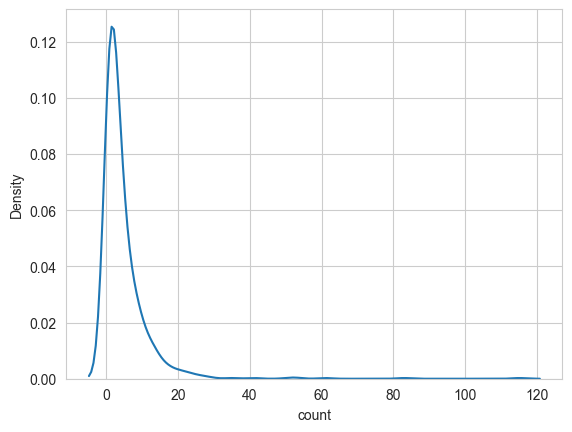

In [3]:
mask_count = annotations['filename'].value_counts()
sns.kdeplot(mask_count)
plt.show()

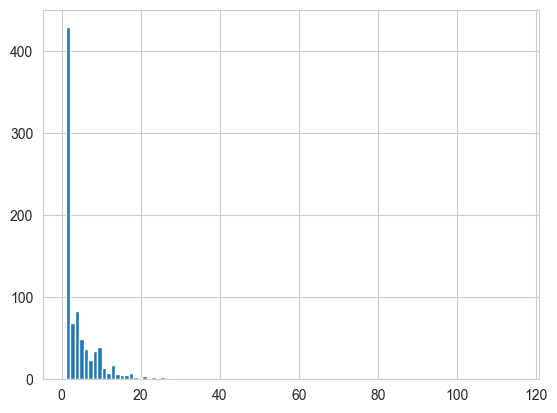

In [12]:
plt.hist(mask_count, bins=100)
plt.show()

In [28]:
mask_count[21:].head(10)

filename
maksssksksss690.png    20
maksssksksss656.png    20
maksssksksss255.png    19
maksssksksss139.png    19
maksssksksss847.png    19
maksssksksss359.png    18
maksssksksss524.png    18
maksssksksss674.png    18
maksssksksss388.png    17
maksssksksss558.png    17
Name: count, dtype: int64

In [27]:
20/len(mask_count)

0.023446658851113716

In [3]:
from datasets import load_dataset

ds = load_dataset("hlydecker/face-masks")

d:\VENVs\face_mask\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating test split: 100%|██████████| 2640/2640 [00:07<00:00, 356.79 examples/s]


In [8]:
save_dir = r"D:\ML_Projects\Face-Mask-Detection-System\Data\HF_1"

In [10]:
from datasets import load_dataset
import requests
from PIL import Image
from io import BytesIO
import os

# Load the dataset
ds = load_dataset("hlydecker/face-masks")

# Define a directory to save the images
save_dir = "downloaded_images"
os.makedirs(save_dir, exist_ok=True)

# Iterate through the dataset and download each image
for i, example in enumerate(ds['train']):
    # Assuming the 'text' column contains image URLs
    image_url = example['text']

    # Download the image
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))

    # Save the image to the specified directory
    img.save(os.path.join(save_dir, f"image_{i}.jpg"))

    print(f"Downloaded {i + 1}/{len(ds['train'])} images")

MissingSchema: Invalid URL '0 0.49853515625 0.31130573248407645 0.0966796875 0.19904458598726116': No scheme supplied. Perhaps you meant https://0 0.49853515625 0.31130573248407645 0.0966796875 0.19904458598726116?

In [11]:
ds

DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 216
    })
    validation: Dataset({
        features: ['text'],
        num_rows: 232
    })
    test: Dataset({
        features: ['text'],
        num_rows: 2640
    })
})

In [ ]:
bboxes = annotations[annotations['filename']==img_names.iloc[index]].iloc[:,1:]

In [3]:
import numpy as np
import pandas as pd
import sys
import os

sys.path.append(r"D:\ML_Projects\Face-Mask-Detection-System\YOLOv3")

import config

annotations = pd.read_csv(config.DATASET + config.TRAIN_FILE)
img_names = pd.read_csv(config.TRAIN_IMG_NAMES)

In [4]:
txt_path = r"D:\ML_Projects\Face-Mask-Detection-System\Data\Kaggle_2\labels"
for (idx, i) in img_names.iterrows():
    with open(os.path.join(txt_path, i[0].split(".")[0] + ".txt"), "w") as f:
        values = annotations[annotations['filename']==i[0]].iloc[:,1:].values
        for value in values:
            f.write(" ".join(map(str, value)) + "\n")